# Tarea 3
### En este notebook se realizarán las comprobaciones correspondientes a la tarea 3, todo el codigo y los resultados hayados servirá para la realización del informe.

En la Tarea 3 se deben implementar las funciones `entrena_perceptron`, `predice` y `evalua` y comprobar su funcionamiento con los datos de entrenamiento y test. 

Para más información sobre estas funciones revisar el informe de prácticas o los comentarios de su implementación.

Estos datos se consiguen a partir de los ya mencionados en la Tarea 2 Ximage e yimage. En este caso, estos datos solo representan aquellas imágenes que representan a la letra A o al número 3, por lo que es una muestra menor que la global, que se utilizará en tareas proximas. 

Para aislar este dataset se deben realizar los siguientes pasos.

In [1]:
from Funciones.Funciones_prop import carga_data_MNIST  #Importamos dicha función
from Funciones.Tarea_1 import crea_diccionario 
from Funciones.Tarea_2 import getdataset

#Cargamos los datos en las variables images y labels
input_path = 'Data'
file_images = 'emnist-balanced-images-idx3-ubyte.gz'
file_labels = 'emnist-balanced-labels-idx1-ubyte.gz'

[images, labels] = carga_data_MNIST(input_path, file_images, file_labels)


#Creamos el diccionario caracteres
archivo_claves = "Data\\claves_ASCII.txt"
caracteres = crea_diccionario(archivo_claves)

#Obtenemso Ximage e yimage
Ximage, yimage= getdataset(images,labels, caracteres, 16)

#Utilizamos una mascara para filtrar los datasets
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))]

#Pasamos y_2C de booleano a binario 0-1 (false-true)
y_2C_num = (y_2C == 'A').astype(int)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
112800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
112800
***********************************


Posteriormente, debemos dividir el dataset en conjuntos de entrenamiento y de test, para ello utilizamos la función `train_test_split` que recoge como parámetros las matrices Ximage e yimage.

In [2]:
from sklearn.model_selection import train_test_split
X2C_train, X2C_test, y2C_train, y2C_test = train_test_split(X_2C, y_2C_num, stratify=y_2C_num, train_size = 0.7 )

Después procedemos a utilizar las funciones `entrena_perceptron`, `predice` y `evalua` con los datasets que hemos obtenido, el conjunto de datos de entrenamiento lo utilizaremos en la función de entrenar y el de test lo utilizaremos para comprobar los resultados del perceptrón en la función predice y observar el porcentaje de acierto en la función evalua.

Compararemos los resultados del perceptrón nuestro contra el perceptrón de Sklearn.

In [3]:
from Funciones.Tarea_3 import entrena_perceptron,evalua, predice, funcion_escalon #Importamos las funciones

z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

#Obtenemos los pesos y el error
weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon) 
#Luego de entrenarlo predecimos con los valores de test
y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon) 
#Comparamos la predicción con los reales
porcentaje_acierto_perceptron_own=evalua(y2C_test, y_pred_2C_own) 

print(porcentaje_acierto_perceptron_own)

0.9930555555555556


Perceptrón de Sklearn:

In [4]:
from sklearn.linear_model import Perceptron
from Funciones.Tarea_3 import evalua 
#Inicializamos el perceptrón
clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True) 
#Lo entrenamos con la función fit()
clf.fit(X2C_train, y2C_train)
#Sacamos las predicciones
y_pred_2C_sk = clf.predict(X2C_test)
#Comparamos la predicción con el real
porcentaje_acierto_perceptron_sk=evalua(y2C_test, y_pred_2C_sk)

print(porcentaje_acierto_perceptron_sk)

0.9951388888888889


A efectos ilustrativos representaremos la matriz de confusión de ambas predicciones, para observar los resultados con exactitud.

### Percepetron propio:

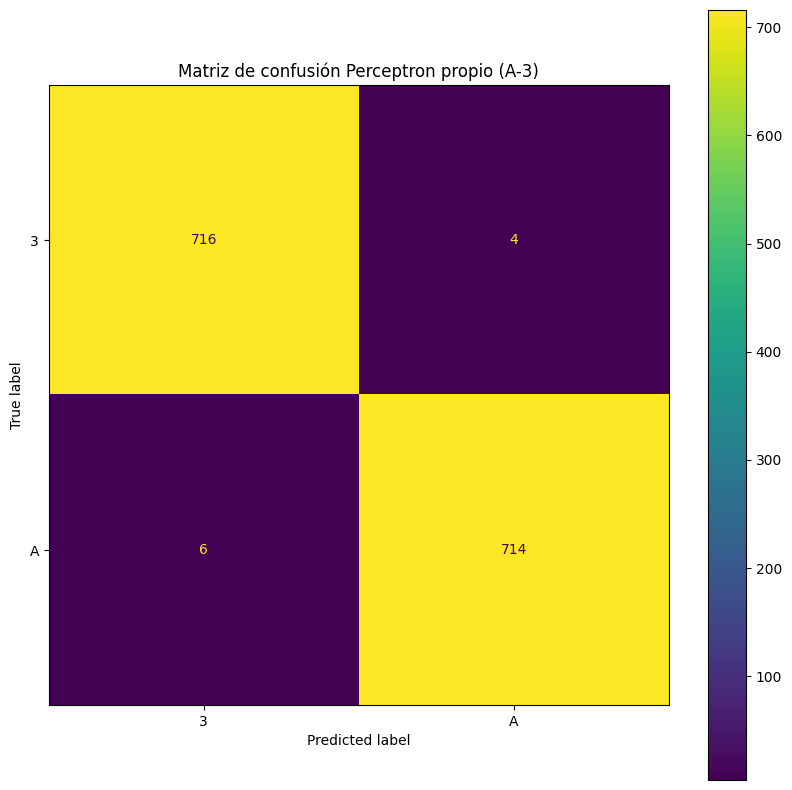

In [5]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

#Matriz de confusión del perceptrón propio

labels=np.unique(y2C_test)

conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_own,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["3" , "A"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron propio (A-3)")
plt.show()

### Perceptrón Sklearn:

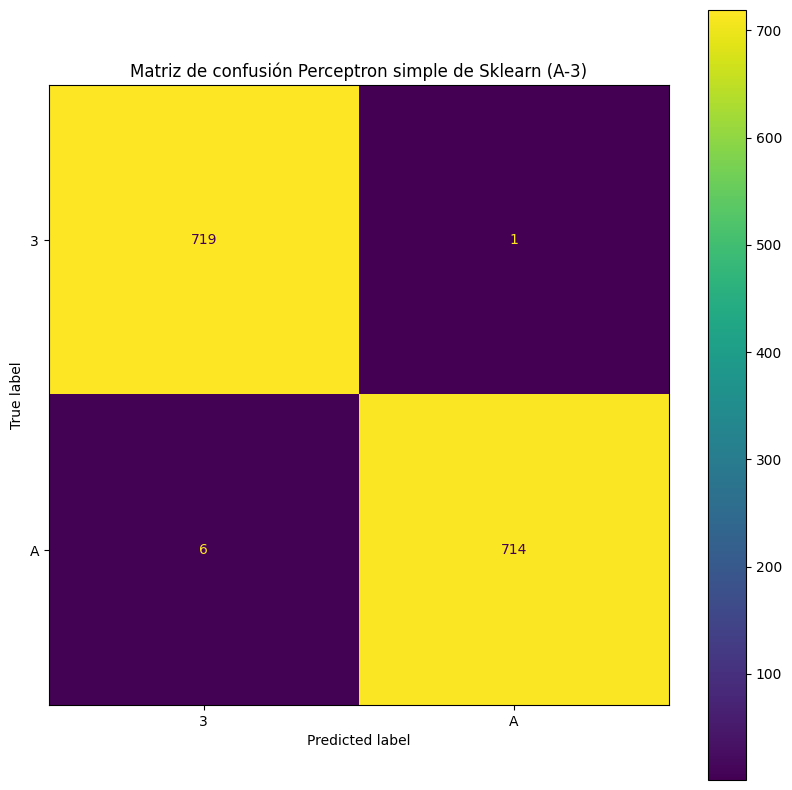

In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y2C_test)

conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_sk,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["3" , "A"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron simple de Sklearn (A-3)")
plt.show()